In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('gss_filtered.csv')

C:\Users\cynth\AppData\Local\Temp\ipykernel_2684\2936053992.py:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('gss_filtered.csv')


In [ ]:
df.shape

(72390, 8)

In [ ]:
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
0,0,NaN,average,NaN,NaN,16.0,NaN,never married
1,1,no,above average,NaN,NaN,10.0,NaN,married
2,2,no,average,NaN,NaN,12.0,NaN,married
3,3,no,average,NaN,NaN,17.0,NaN,married
4,4,no,below average,NaN,NaN,12.0,NaN,married


In [ ]:
# Cleaned arrest

df['arrest'].unique()
df = df[df['arrest'].notna()].replace('no',0).replace('yes',1).replace('refused_(3)',np.nan)
df = df[df['arrest'].notna()]
df['arrest'].unique()

array([0., 1.])

In [ ]:
df['rincome'].unique()

array([nan, '$1,000 to $2,999', '$15,000 to $19,999', '$7,000 to $7,999',
       '$8,000 to $9,999', '$20,000 to $24,999', '$4,000 to $4,999',
       '$10,000 to $14,999', '$25,000 or more', '$3,000 to $3,999',
       'under $1,000', '$5,000 to $5,999', '$6,000 to $6,999'],
      dtype=object)

In [ ]:
# Cleaned data of rincome

df = df[df['rincome'].notna()].replace('$1,000 to $2,999', 1).replace('$15,000 to $19,999',9).replace('$7,000 to $7,999',6).replace('$8,000 to $9,999',7).replace('$20,000 to $24,999',10).replace('$4,000 to $4,999',3).replace('$10,000 to $14,999',8).replace('$25,000 or more',11).replace('$3,000 to $3,999',2).replace('under $1,000',0).replace('$5,000 to $5,999',4).replace('$6,000 to $6,999',5)

In [ ]:
# Cleaned data of incom16

df['incom16'].unique()
df = df[df['incom16'].notna()].replace('far below average',0).replace('below average',1).replace('average',2).replace('above average',3).replace('far above average',4)
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
3117,3117,0.0,3,0.0,1,14.0,0.0,married
3118,3118,0.0,2,0.0,9,16.0,1.0,married
3121,3121,NaN,2,0.0,6,12.0,1.0,never married
3122,3122,0.0,2,0.0,7,16.0,1.0,married
3123,3123,0.0,1,0.0,10,17.0,1.0,married


In [ ]:
# Cleaned marital variable

df['marital'].unique()
df['marital'] = df['marital'].replace('married',0).replace('never married',0).replace('widowed',0).replace('divorced',1).replace('separated',1)
df['marital'].unique()

array([0, 1], dtype=int64)

In [ ]:
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
3117,3117,0.0,3,0.0,1,14.0,0.0,0
3118,3118,0.0,2,0.0,9,16.0,1.0,0
3121,3121,NaN,2,0.0,6,12.0,1.0,0
3122,3122,0.0,2,0.0,7,16.0,1.0,0
3123,3123,0.0,1,0.0,10,17.0,1.0,0


In [ ]:
df = df.drop('divorce',axis=1).drop('rincome',axis=1)
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,14.0,0.0,0
3118,3118,2,0.0,16.0,1.0,0
3121,3121,2,0.0,12.0,1.0,0
3122,3122,2,0.0,16.0,1.0,0
3123,3123,1,0.0,17.0,1.0,0


In [ ]:
print(df.isna().sum())

Unnamed: 0     0
incom16        0
arrest         0
educ          10
ticket         8
marital        0
dtype: int64


In [ ]:
# Cleaned ticket variable

df = df[df['ticket'].notna()]
df['ticket'].unique()

array([0., 1.])

In [ ]:
# Cleaned education variable part 1

df = df[df['educ'].notna()]
df['educ'].unique()

array([14., 16., 12., 17., 11.,  8.,  9., 15., 13., 10., 20., 18.,  7.,
       19.,  0.,  4.,  6.,  5.,  3.,  2.,  1.])

In [ ]:
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,14.0,0.0,0
3118,3118,2,0.0,16.0,1.0,0
3121,3121,2,0.0,12.0,1.0,0
3122,3122,2,0.0,16.0,1.0,0
3123,3123,1,0.0,17.0,1.0,0


In [ ]:
# Cleaned education variable part 2

def educ(x):
    if (0 <= x <= 11):
        return 0
    elif(x == 12):
        return 1
    elif(13 <= x <=15):
        return 2
    elif(x == 16):
        return 3
    elif(x > 16):
        return 4
df['educ'] = df['educ'].apply(educ)
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,2,0.0,0
3118,3118,2,0.0,3,1.0,0
3121,3121,2,0.0,1,1.0,0
3122,3122,2,0.0,3,1.0,0
3123,3123,1,0.0,4,1.0,0


In [ ]:
import seaborn as sns

In [ ]:
var1 = 'incom16'
var2 = 'arrest'
var3 = 'educ'
var4 = 'ticket'
var5 = 'marital'

# sns.countplot(data=df, x=var1, hue = var2)

<AxesSubplot: xlabel='incom16', ylabel='Percentage'>

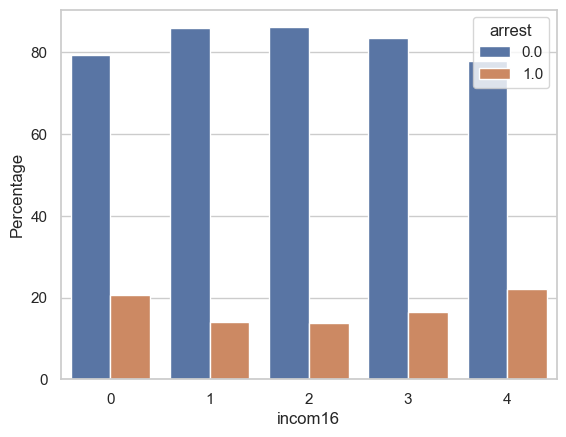

In [ ]:
# plot incom16 and arrest
def calculate_percentages(group):
    total_count = group.sum()
    return 100 * group / total_count

# Calculate percentages for each combination of var1 and var2
grouped_data = df.groupby([var1, var2]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

# Create the countplot
sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var2)

In [ ]:
# Incom16 grouped by arrest
#df.groupby(['incom16','arrest']).size().unstack().plot(kind='bar',stacked=True)

**Data:**
The dataset used for this project is the General Social Survey, a survey that has been conducted annually since 1972. The motivation behind this survey is to examine Americans’ social and economic views, and how they have changed over time. An important question that could be derived from this dataset is, “How does household income when you were growing up affect your adult life?” We use the variable ‘incom16’ as the foundation to our question, along with 3 variables to represent factors of “adult life,” like education, arrests, and marital status.

<AxesSubplot: xlabel='incom16', ylabel='Percentage'>

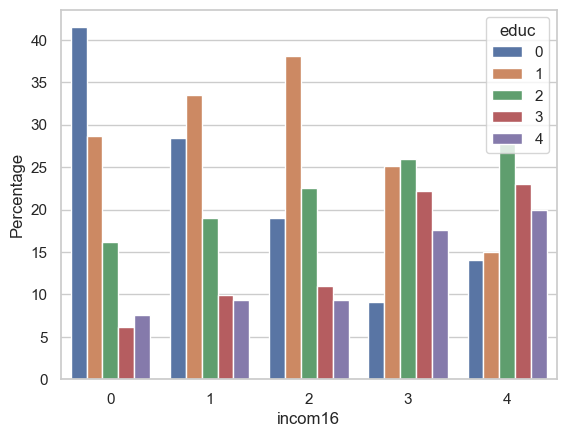

In [ ]:
# Incom16 grouped by education

grouped_data = df.groupby([var1, var3]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var3)


#ptable = df.groupby(['incom16','educ']).size().unstack()
#ax = ptable.plot(kind='bar',stacked=True)
#sns.countplot(data=df, x=var1, hue = var3)


<Axes: xlabel='incom16', ylabel='Percentage'>

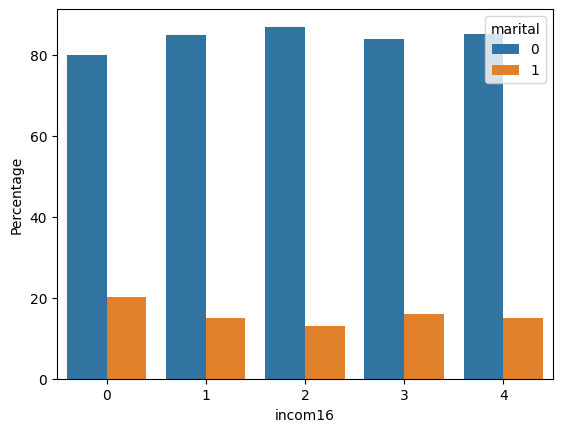

In [30]:
# Incom16 grouped by divorce
#group_by = 'incom16'
#var = 'marital'
#df_wide = df.pivot(columns=group_by,values=var)
#df_wide.plot.density()
#df_wide.loc[:,['0','1','2','3','4']].plot.density()
#df.groupby(['incom16','marital']).size().unstack().plot(kind='bar',stacked=True)

grouped_data = df.groupby([var1, var5]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var5)

#get divorce percentages GIVEN person is married